In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from numpy.linalg import inv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

#Basically these are the 3 points we will be investigating in the dataset
#Part 1: Which of the features negatively affects the price?
#Part 2: What are the top 5 factors that strongly contribute to the price in the positive direction?
#Part 3: How big on the price is the influence of the factors not represented in the data?


In [2]:
#taking an overview look at the dataset
df = pd.read_csv("C:/Users/magagunk/OneDrive - Vodafone Group/Documents/Project1-BMW pricing challenge/archive (3)/bmw_pricing_challenge.csv")
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [3]:
#checking how many rows and columns we have in our dataset
num_rows = df.shape[0] 
num_cols = df.shape[1]
print(num_rows)
print(num_cols)

4843
18


In [4]:
#checking if we have columns with missing values
no_nulls = set(df.columns[df.isnull().mean()==0])
print(no_nulls)
#We don't have missing values as none of the columns have missing values

{'feature_1', 'registration_date', 'engine_power', 'mileage', 'price', 'fuel', 'maker_key', 'feature_4', 'feature_5', 'feature_2', 'car_type', 'paint_color', 'model_key', 'feature_6', 'feature_7', 'sold_at', 'feature_3', 'feature_8'}


In [5]:
df.info() # double checking if there are really no missing values
#also checking what type of data each column is
# we find boolean, integer and object variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


<Axes: >

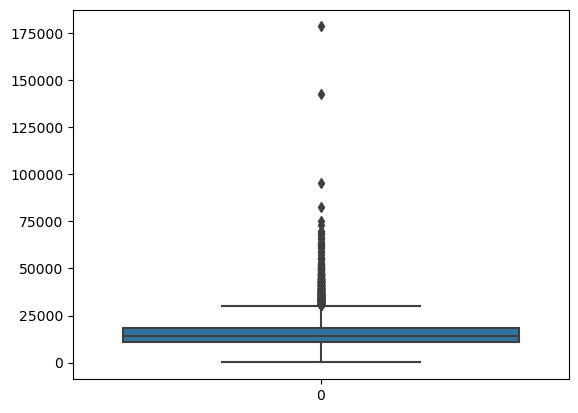

In [6]:
#checking for outliers because some cars may be few and very expensive which can badly affect out predection
sb.boxplot(df['price'])

In [7]:
#checking the price of the top 3 cars by sorting them to ranck from highest to lowest
sorted(df['price'],reverse = True)

[178500,
 142800,
 95200,
 82400,
 75000,
 73100,
 69700,
 68700,
 68300,
 68300,
 66600,
 65400,
 64300,
 63700,
 63100,
 62500,
 62500,
 61200,
 60700,
 59300,
 58300,
 57100,
 55700,
 55500,
 55300,
 55200,
 53600,
 52400,
 52200,
 51500,
 51200,
 50600,
 50000,
 50000,
 50000,
 49900,
 49900,
 49700,
 49100,
 48800,
 48800,
 48200,
 47400,
 47300,
 47000,
 47000,
 47000,
 47000,
 46600,
 46500,
 46400,
 46300,
 46300,
 46100,
 45800,
 45500,
 45500,
 45300,
 45100,
 44700,
 44700,
 44600,
 44600,
 44600,
 44300,
 44300,
 44100,
 44000,
 43800,
 43700,
 43600,
 43400,
 43400,
 43400,
 43400,
 43400,
 43400,
 43300,
 43000,
 43000,
 42800,
 42800,
 42800,
 42700,
 42700,
 42700,
 42400,
 42200,
 42100,
 42100,
 42000,
 41900,
 41600,
 41600,
 41600,
 41600,
 41300,
 41300,
 41200,
 41200,
 41200,
 41100,
 41100,
 41100,
 41100,
 40900,
 40900,
 40700,
 40700,
 40500,
 40500,
 40500,
 40500,
 40000,
 40000,
 40000,
 39900,
 39900,
 39900,
 39900,
 39900,
 39900,
 39500,
 39400,
 39300

In [8]:
df = df[~(df['price']>=95200) & (df['price']<=178500)] #removing the top 3 outliers
df.shape #checking if the 3 rows for the outliers are removed

(4840, 18)

<Axes: >

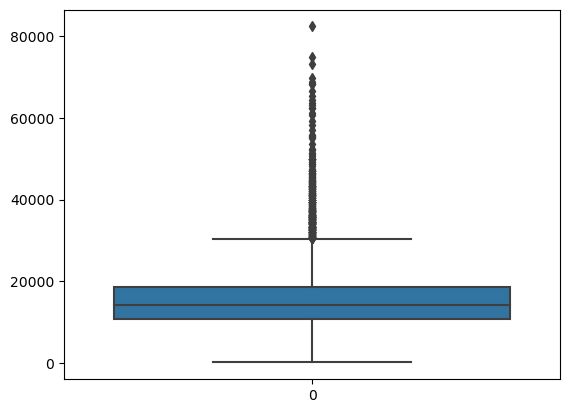

In [9]:
#checking the box plot again after removing outliers 
sb.boxplot(df['price'])

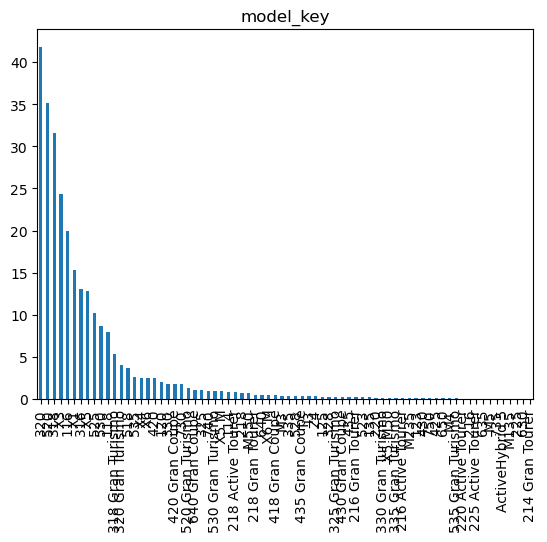

In [10]:
# lets plot and see count of the BMW different models using a bar chart
model_vals = df.model_key.value_counts()

(model_vals/df.shape[1]).plot(kind= "bar");
plt.title('model_key');

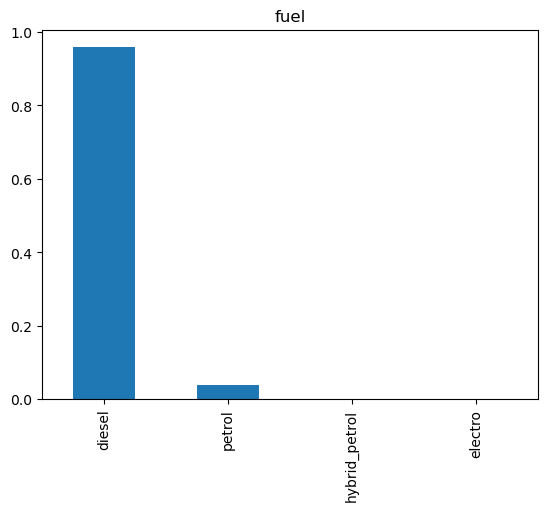

In [11]:
# Lets plot to see the distribution between different fuel types so as to understand the popular fuel option
fuel_vals = df.fuel.value_counts()

(fuel_vals/df.shape[0]).plot(kind= "bar");
plt.title('fuel');

In [12]:
#looking at the overall stats of the dataset
df.describe()

,mileage,engine_power,price
count,4.840000e+03,4840.00000,4840.000000
mean,1.410113e+05,128.97624,15751.838843
std,6.017652e+04,39.00057,8657.857012
min,-6.400000e+01,0.00000,100.000000
25%,1.030112e+05,100.00000,10800.000000
50%,1.411045e+05,120.00000,14200.000000
75%,1.752215e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,82400.000000


array([[<Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'engine_power'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

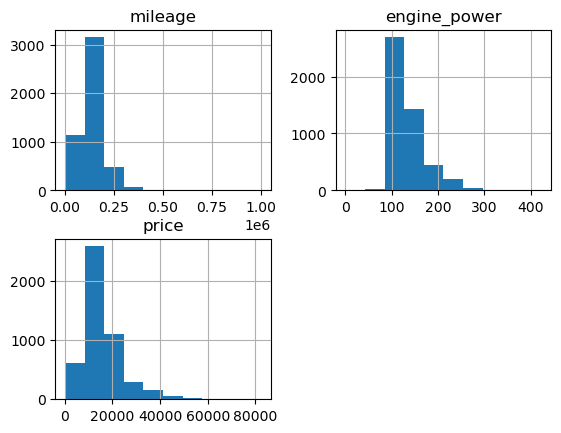

In [13]:
#Looking at the distribution of the data
df.hist()

In [14]:
#Looking at the correlation of factors influencing the price
#creating a matrix gradient to clearly see how much each factor influences the price
correlate_matrix = df.corr()
correlate_matrix.style.background_gradient(cmap='plasma')
#this does not yet answer our first question, we was to look further using the linear regression model

C:\Users\magagunk\AppData\Local\Temp\ipykernel_3088\2236620660.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlate_matrix = df.corr()


,mileage,engine_power,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price
mileage,1.000000,-0.049618,0.065577,0.009538,0.003805,-0.053296,0.046265,-0.030103,0.152891,-0.040148,-0.426216
engine_power,-0.049618,1.000000,0.327136,0.201239,0.313047,0.448012,0.341315,0.232283,0.009842,0.488486,0.677345
feature_1,0.065577,0.327136,1.000000,0.305555,0.255598,0.230283,0.278245,0.134410,0.244396,0.225602,0.286820
feature_2,0.009538,0.201239,0.305555,1.000000,0.151716,0.149905,0.285245,0.136072,0.370105,0.224344,0.268116
feature_3,0.003805,0.313047,0.255598,0.151716,1.000000,0.199686,0.199369,0.144349,0.063592,0.202176,0.262561
feature_4,-0.053296,0.448012,0.230283,0.149905,0.199686,1.000000,0.250292,0.153199,0.125817,0.277230,0.445866
feature_5,0.046265,0.341315,0.278245,0.285245,0.199369,0.250292,1.000000,0.257257,0.202468,0.332529,0.281000
feature_6,-0.030103,0.232283,0.134410,0.136072,0.144349,0.153199,0.257257,1.000000,0.128820,0.121005,0.229732
feature_7,0.152891,0.009842,0.244396,0.370105,0.063592,0.125817,0.202468,0.128820,1.000000,-0.063084,0.014943
feature_8,-0.040148,0.488486,0.225602,0.224344,0.202176,0.277230,0.332529,0.121005,-0.063084,1.000000,0.464061


In [15]:
#Lets dummy the catagorical variables to prepare it for linear regression since we can't do regression with catagorical data
# Below we are using a for-loop to dummy against the catagorical data 
LEdr = LabelEncoder()
for p in df.columns[0:]:
    if (df[p].dtype == 'object' or df[p].dtype == 'bool'):
        df[p] = LEdr.fit_transform(df[p])
    else:
        df[p] = df[p]
df

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,0,2,140411,100,134,0,1,0,1,1,0,0,1,1,1,0,11300,0
1,0,61,13929,317,184,3,5,0,1,1,0,0,0,1,1,1,69700,1
2,0,21,183297,120,136,0,9,0,0,0,0,0,1,0,1,0,10200,1
3,0,31,128035,135,163,0,7,0,1,1,0,0,1,1,1,1,25100,1
4,0,33,97097,160,168,0,8,0,1,1,0,0,0,1,1,1,33400,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,0,13,39743,110,178,0,1,7,0,1,0,0,0,0,1,0,14600,7
4839,0,12,49832,100,174,0,5,7,0,1,0,0,0,0,1,1,17500,7
4840,0,13,19633,110,178,0,5,7,0,1,0,0,0,0,1,1,17000,8
4841,0,12,27920,110,184,0,3,7,1,1,0,0,0,0,1,1,22700,8


In [16]:
#on x we remove the price column as this is the data we are feeding against the price
# maker_key is also dropped because there is only 1 make in this dataset (BMW).
#paint_color dropped as it generally does not matter much with used cars
#fuel type dropped due to the fact that more than 90% are one type of fuel (diesel)
# y is the answer we are looking for (price)
x = df.drop(['price', 'maker_key', 'fuel', 'paint_color'], axis=1)
y = df['price']
x #checking what has been dropped

,model_key,mileage,engine_power,registration_date,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,sold_at
0,2,140411,100,134,0,1,1,0,0,1,1,1,0,0
1,61,13929,317,184,0,1,1,0,0,0,1,1,1,1
2,21,183297,120,136,0,0,0,0,0,1,0,1,0,1
3,31,128035,135,163,0,1,1,0,0,1,1,1,1,1
4,33,97097,160,168,0,1,1,0,0,0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,13,39743,110,178,7,0,1,0,0,0,0,1,0,7
4839,12,49832,100,174,7,0,1,0,0,0,0,1,1,7
4840,13,19633,110,178,7,0,1,0,0,0,0,1,1,8
4841,12,27920,110,184,7,1,1,0,0,0,0,1,1,8


In [17]:
#On our second question we want to find the best regression model to use for our price predicton, this will also help with the weight of each coefficient
#Let me now split the data into Training set and Test set
# We will use 20% of the data for testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state = 42)

In [18]:
#We will start by looking at the multiple linear regression model
#for us to fit multiple linear regression to the trainig set we will import LinearRegression library
Regr = LinearRegression()
Regr.fit(x_train, y_train)

LinearRegression()

In [19]:
#Predicting the test set results
y_predict_test = Regr.predict(x_test)
y_predict_test

array([ 22017.32258163,  11657.15977872,  35840.76145673,   8402.90225913,
        13877.1487859 ,  11983.73573025,   1638.37274069,  28100.90453898,
        10317.46314366,  12101.17182339,  -2737.34409135,  11983.09638719,
        12052.59182074,  21666.10511157,   7724.49048069,  -6919.73972491,
        19272.89286333,  17272.61302427,  16323.24127545,  10279.34378816,
        12816.82836249,  22638.10617549,   6940.37642924,  21348.04847076,
        13927.59830228,  -1129.39695565,  20785.45883699,   9519.87717787,
        25822.26065397,  20371.17217415,  25544.72935224,  17286.06370089,
        11323.50849424,  21879.67989182,  15336.51624343,  15111.1940968 ,
        11468.51055472,  17082.65847751,  13819.29675669,  33814.12306485,
        26120.73296107,  11620.0383957 ,  10091.78272788,  12623.13764729,
        21437.61149687,  21088.66471576,  18676.96451969,  11095.91258249,
        24722.07856296,   6392.9425646 ,   -837.2596747 ,  27370.49487618,
        23342.99519618,  

In [20]:
#Predicting the test set results
y_predict_train = Regr.predict(x_train)
y_predict_train

array([22220.95804949, 14524.7664815 , 11700.00942225, ...,
       17441.94529762, 14038.76587995,   670.03848496])

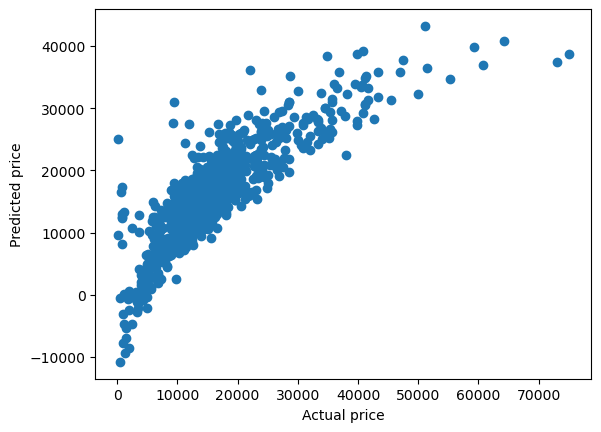

In [21]:
#Does the model show us a linear regression on the scatter plot?
#We find it is linear, but we may have to test we other regression models to find the best one to help pridict car price
plt.scatter(y_test, y_predict_test)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.show()


In [22]:
#Lets calculate the coefficients
print(Regr.coef_)
#The negative values affect the price negatively, while the positive values help to bring up the price
#This answers the first question, but we want to see the weight of variable ranking from highest to lowest

[ 4.63241929e+01 -3.36938993e-02  1.02140608e+02  9.46203089e+01
  4.11685296e+02  1.37062685e+03  3.66586729e+01  8.31878434e+02
  1.15602235e+03 -2.72646432e+02  9.86968339e+02  2.24374277e+03
  1.47884179e+03  7.07389984e+01]


In [23]:
#The below helper code was taken from Udacity study material
#Below we are looking at the size of the coefficients in the model-
#-as an indication of the impact of each variable on the price.
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['Factors Involved'] = X_train.columns
    coefs_df['coefs'] = Regr.coef_ # this will show the size of the coefficients and they direction (positive or negative) based on linear model
    coefs_df['abs_coefs'] = np.abs(Regr.coef_)  
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False) #making all the values coeffient values positive for us to make percentages
    return coefs_df

coef_df = coef_weights(Regr.coef_,x_train)
coef_df.head(20)


,Factors Involved,coefs,abs_coefs
11,feature_7,2243.742770,2243.742770
12,feature_8,1478.841787,1478.841787
5,feature_1,1370.626847,1370.626847
8,feature_4,1156.022346,1156.022346
10,feature_6,986.968339,986.968339
7,feature_3,831.878434,831.878434
4,car_type,411.685296,411.685296
9,feature_5,-272.646432,272.646432
2,engine_power,102.140608,102.140608
3,registration_date,94.620309,94.620309


In [24]:
#The coefficent weights with the the percentages
#Adding percentage to the size of each coefficient againts the price.
coef_df['%'] = coef_df['coefs']/np.sum(coef_df['coefs'])
coef_df

#Below we can find the answers to our first 2 questions, givings better insights on what each factor contributes (either positive or negative)

,Factors Involved,coefs,abs_coefs,%
11,feature_7,2243.742770,2243.742770,0.262194
12,feature_8,1478.841787,1478.841787,0.172811
5,feature_1,1370.626847,1370.626847,0.160165
8,feature_4,1156.022346,1156.022346,0.135088
10,feature_6,986.968339,986.968339,0.115333
7,feature_3,831.878434,831.878434,0.097210
4,car_type,411.685296,411.685296,0.048108
9,feature_5,-272.646432,272.646432,-0.031860
2,engine_power,102.140608,102.140608,0.011936
3,registration_date,94.620309,94.620309,0.011057


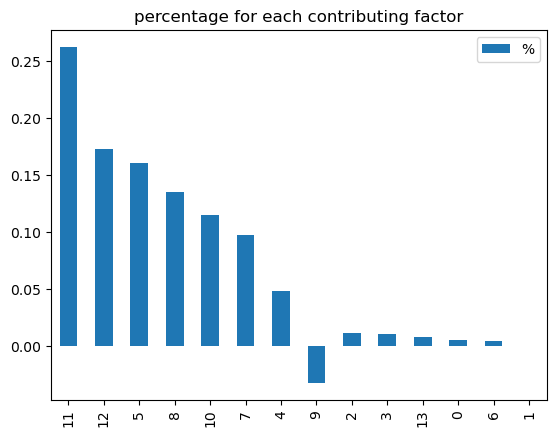

In [25]:
#Making a plot for the above for better visualisation
X = coef_df.drop([ 'coefs', 'abs_coefs'], axis=1)
Y = coef_df['Factors Involved']
X

(X).plot(kind= "bar");
plt.title('percentage for each contributing factor');

In [26]:
#looking at the intercept
print(Regr.intercept_)

-13799.828345832719


In [27]:
#looking at the R squared value to determine the accuracy of our test predection
r2_score(y_test, y_predict_test)
#We can fit the model as it exibits a leaner regression and Rsquared is close to 1


0.7198283145896047

In [28]:
#The mean squared error of the price in linear regression
mean_sq_error = mean_squared_error(y_test,y_predict_test)
mean_sq_error

22298694.988630444

In [29]:
#The mean absolute error of the price in linear regression
mean_abs_lin_error = mean_absolute_error(y_test,y_predict_test)
mean_abs_lin_error

3165.8383484562246

In [30]:
#converting series to numpy array by using the function this function (to_numpy())
x_train,x_test,y_train,y_test = train_test_split(x.to_numpy(),y.to_numpy(),test_size= 0.2, random_state = 42) 


In [31]:
#lets look at other regression models (Random Forest and Gradient Boost) to see which one will work best
#below we are importing the models.
#The 2 chosen models to compare with have an advantage over the linear regression model- 
#-as they are able to find non-linear relations between depended and indepent variables.
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
Rfgr = RandomForestRegressor()
Rfgr.fit(x_train,y_train)

GrBgr = GradientBoostingRegressor()
GrBgr.fit(x_train,y_train)

GradientBoostingRegressor()

In [33]:
#Predicting the test set results for each model

y_predict_test1 = Rfgr.predict(x_test) #this is from the Random forest regressor
y_predict_test2 = GrBgr.predict(x_test) #this is from the Gradient boost regressor

In [34]:
#Lets evaluate the algorithm

check1 = metrics.r2_score(y_test, y_predict_test) #linear regression
check2 = metrics.r2_score(y_test, y_predict_test1) #Random forest regressor
check3 = metrics.r2_score(y_test, y_predict_test2) #Gradient boost regressor
print(check1,check2,check3)
#In this case, either Random forest or Gradient Boost come out with better results than the linear regression model
#I will go with the Random Forest regressor as it comes out slightly better for this dataset

0.7198283145896047 0.8833192885041741 0.8801823401093283


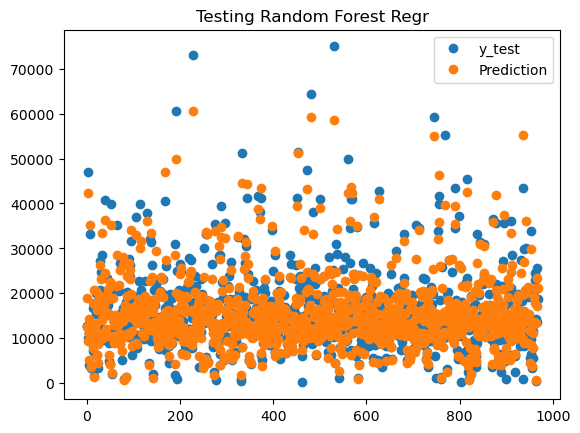

In [35]:
#The to_numpy() function allows me to plot a graph for the Random forest regressor for a -
#- better comparison between test and prediction
_,bx = plt.subplots(1,1)
plt.title('Testing Random Forest Regr')
bx.plot(y_test,'o', label='y_test')
bx.plot(y_predict_test1,'o', label='Prediction') #ploting the predictions in orange against the test using Random Forest
bx.legend()
plt.show()
#With the below plot we can better visualise the accuracy of the chosen model in price prediction

In [36]:
#calculation the mean absolute error of the price in Random Forest regressor
from sklearn.metrics import mean_absolute_error
mean_absolute_error = mean_absolute_error(y_test,y_predict_test1)
mean_absolute_error #This shows us how much in dollars "price prediction" the average absolute error is 

1905.4473140495868